<h1 style="text-align: center;">MODEL INTERPRETATION</h1>

### Import the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import sklearn

from joblib import load

import shap
shap.initjs()

### Load the Data

In [2]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = load(r"./data/preprocessed_data.joblib")

### Load the Model

In [3]:
BEST_MODEL = load(r"./model/best_model (imbalanced).joblib")

In [4]:
BEST_MODEL

LGBMClassifier(boosting_type='goss', learning_rate=0.044481715367932224,
               max_depth=3, n_estimators=150, n_jobs=-1, num_leaves=170,
               reg_alpha=0.785698331439618)

### Model Feature Importance

In [5]:
def plot_feature_importances(model: sklearn.base.BaseEstimator) -> None:
    """
        plots the random forest's feature importance using bar graph.

        Parameters
        ------------
        model : sklearn.base.BaseEstimator
                the scikit-learn model to plot its feature importance

        Returns
        ------------
        None
    """

    N_FEATURES = X_TRAIN.shape[1]

    # get the random forest feature importances and its corresponding columns
    RESULTS = {column:value for value, column in zip(model.feature_importances_, X_TRAIN.columns)}

    # sort the previous results
    SORTED_RESULTS = {column:value for column, value in sorted(RESULTS.items(), key = lambda x: x[1])}

    plt.barh(range(len(SORTED_RESULTS.values())), SORTED_RESULTS.values(), align="center", color="steelblue")
    plt.yticks(range(len(SORTED_RESULTS.values())), SORTED_RESULTS.keys())

    plt.title("LGBM:Feature Importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")   
    
    plt.ylim(-1, N_FEATURES)

    plt.show()

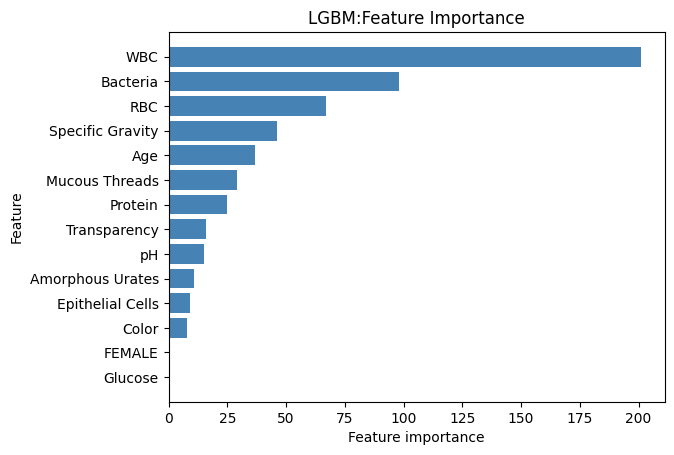

In [6]:
plot_feature_importances(BEST_MODEL)

### Data for Local Interpretability (Positive)

In [7]:
# Sample data to use for local interpretability (POSITIVE)
SAMPLE_INDEX_POSITIVE  = -1
INPUT_DATA_POSITIVE = X_TEST.iloc[SAMPLE_INDEX_POSITIVE]
LABEL_POS = Y_TEST.to_list()[SAMPLE_INDEX_POSITIVE]



In [8]:
INPUT_DATA_POSITIVE = X_TEST.iloc[SAMPLE_INDEX_POSITIVE]
INPUT_DATA_POSITIVE

Age                 0.162133
Color               0.714286
Transparency             0.0
Glucose                  0.0
Protein                  0.0
pH                  0.333333
Specific Gravity         0.2
WBC                     0.75
RBC                      0.0
Epithelial Cells         0.0
Mucous Threads           0.0
Amorphous Urates         0.0
Bacteria                 0.6
FEMALE                 False
Name: 430, dtype: object

In [9]:
LABEL_POS

1

### Data for Local Interpretability (Negative)

In [10]:
# Sample data to use for local interpretability (NEGATIVE)
SAMPLE_INDEX_NEGATIVE = -14
INPUT_DATA_NEGATIVE = X_TEST.iloc[SAMPLE_INDEX_NEGATIVE]
LABEL_NEG = Y_TEST.to_list()[SAMPLE_INDEX_NEGATIVE]

In [11]:
INPUT_DATA_NEGATIVE = X_TEST.iloc[SAMPLE_INDEX_NEGATIVE]
INPUT_DATA_NEGATIVE

Age                  0.45593
Color               0.571429
Transparency             0.0
Glucose                  0.0
Protein                  0.5
pH                  0.333333
Specific Gravity         0.6
WBC                      0.0
RBC                      0.0
Epithelial Cells    0.166667
Mucous Threads      0.166667
Amorphous Urates    0.166667
Bacteria                 0.6
FEMALE                  True
Name: 417, dtype: object

In [12]:
LABEL_NEG

0

### Local Interpretability (SHAP)

In [13]:
# Convert boolean values to integers in the "FEMALE" column of X_train_unscaled
X_TRAIN["FEMALE"] = [1 if bool_ else 0 for bool_ in X_TRAIN["FEMALE"]]

# Convert boolean values to integers in the "FEMALE" column of X_test_unscaled
X_TEST["FEMALE"] = [1 if bool_ else 0 for bool_ in X_TEST["FEMALE"]]

In [14]:
# Create a SHAP TreeExplainer for the best Light GBM model
EXPLAINER = shap.TreeExplainer(BEST_MODEL)

# Compute SHAP values for the entire unscaled test set
SHAP_VALUES = EXPLAINER.shap_values(X_TEST, check_additivity=False)

#### Local Positive

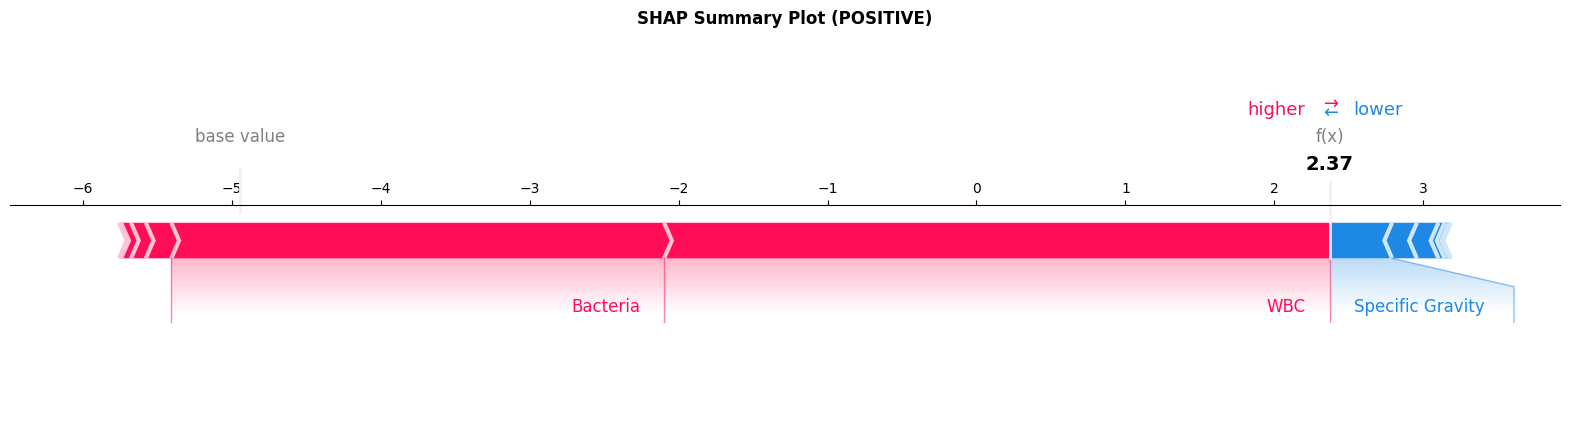

In [15]:
shap.force_plot(EXPLAINER.expected_value[1], SHAP_VALUES[1][SAMPLE_INDEX_POSITIVE], X_TRAIN.columns, matplotlib=True, show=False)
plt.title("SHAP Summary Plot (POSITIVE)", fontdict={"fontweight":"bold"}, y=1.75)
plt.show()


#### Local Negative

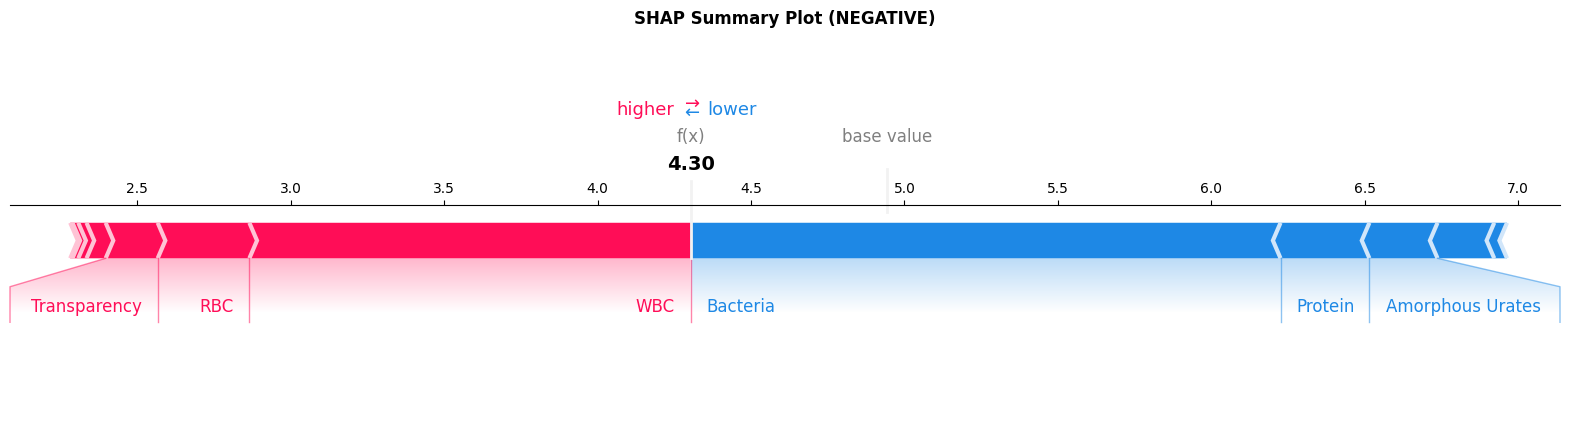

In [16]:
shap.force_plot(EXPLAINER.expected_value[0], SHAP_VALUES[0][SAMPLE_INDEX_NEGATIVE], X_TRAIN.columns, matplotlib=True, show=False)
plt.title("SHAP Summary Plot (NEGATIVE)", fontdict={"fontweight":"bold"}, y=1.75)
plt.show()

### Global Interpretability (SHAP)

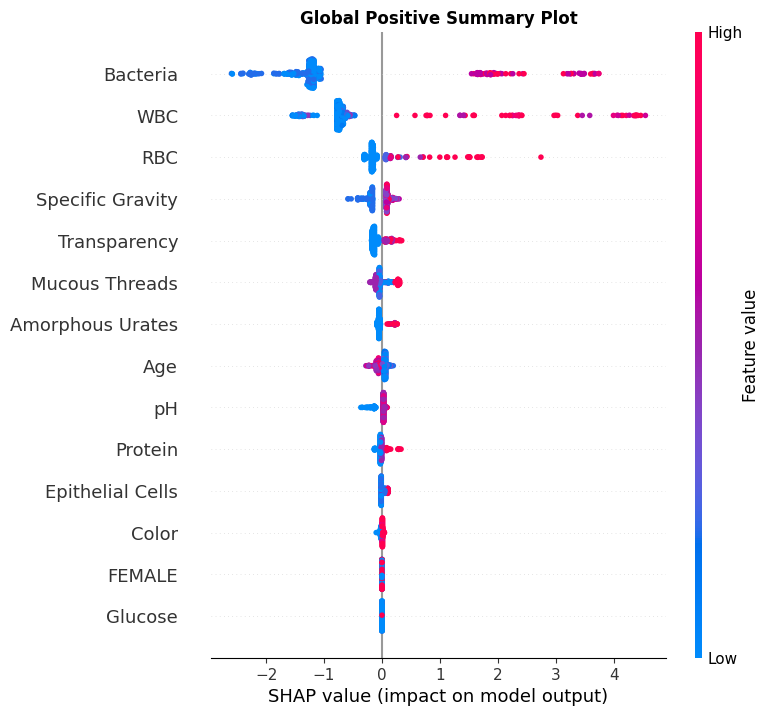

In [17]:
# SHAP Global Positive Summary Plot
shap.summary_plot(SHAP_VALUES[1], X_TEST, show=False)
plt.title("Global Positive Summary Plot", fontdict={"fontweight":"bold"})
plt.show()